In [ ]:
# Timing

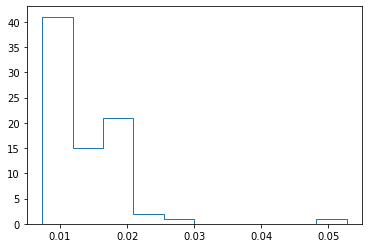

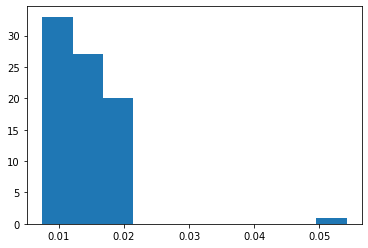

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Times_1 = np.array([0.007334687000000173, 0.008084392000000218, 0.008076669999999897, 0.008194349000000045, 0.009823732999999724, 0.007671030000000023, 0.00922863900000026, 0.01032492400000029, 0.013577906000000084, 0.011439095999999704, 0.00841852799999998, 0.009523335000000355, 0.011340199000000162, 0.010735766000000257, 0.009509996999999881, 0.013845348999999896, 0.010315809999999814, 0.012576140999999819, 0.010761635999999797, 0.01127883400000007, 0.012650718000000172, 0.010829803000000027, 0.016141764999999975, 0.015242234000000021, 0.010992329000000023, 0.009494207000000365, 0.013080042999999986, 0.009261931999999806, 0.011028023999999803, 0.00895006399999998, 0.008216508999999927, 0.015620296999999894, 0.01736571100000006, 0.029620938999999957, 0.02439570400000024, 0.0172080750000001, 0.019832576000000213, 0.01550915900000005, 0.016565890999999944, 0.016549378000000114, 0.007478416000000099, 0.011476867999999918, 0.013758134000000144, 0.008604588000000302, 0.016483914999999794, 0.010726067000000228, 0.009792426000000187, 0.016084759000000393, 0.014977230000000397, 0.019211737000000007, 0.01785566199999966, 0.01836417300000015, 0.017269139999999794, 0.017275892999999876, 0.018935917000000302, 0.018097163999999832, 0.018963335999999664, 0.0194241289999999, 0.021088963000000405, 0.02037065800000004, 0.01932414799999993, 0.009317835000000052, 0.01324799100000007, 0.017980136000000257, 0.01836342999999996, 0.019491469000000095, 0.019115783000000164, 0.009868859999999202, 0.012526206000000428, 0.01342514799999961, 0.01001301500000018, 0.01039604800000049, 0.007733124999999674, 0.00816301099999972, 0.008999798999999697, 0.011011803000000597, 0.0114505669999998, 0.009389199000000126, 0.007696897999999841, 0.052705941000000145, 0.009131136000000595])
Times_2 = np.array([0.008616330000000172, 0.008521733999999892, 0.008360531000000115, 0.011229210000000212, 0.02040735699999985, 0.008311077000000111, 0.015883102999999732, 0.015424820000000228, 0.018064784000000333, 0.009482124999999897, 0.008387901999999947, 0.013814879999999974, 0.010095724999999778, 0.015171506000000168, 0.009382415999999782, 0.013410102000000368, 0.012849508000000398, 0.01681671199999979, 0.009156158999999775, 0.015603252000000012, 0.014304338000000083, 0.01659407299999982, 0.01623209499999989, 0.016232668999999866, 0.02003588100000009, 0.017175190000000118, 0.018572182999999853, 0.009552658000000047, 0.016675127000000067, 0.017033045999999885, 0.008239501999999899, 0.014464033999999959, 0.016974396999999808, 0.017629508000000182, 0.016202977999999923, 0.017336302999999997, 0.018373269000000025, 0.015418606999999973, 0.01637481900000015, 0.009321914000000042, 0.007764371999999575, 0.009255340000000167, 0.009240769999999898, 0.008367444999999751, 0.015645729000000053, 0.00917052000000007, 0.013914854999999893, 0.014463381000000108, 0.013899251000000223, 0.010290668999999752, 0.010008701000000286, 0.015340451000000144, 0.016332450000000165, 0.017136251000000158, 0.016957484999999828, 0.018563769000000008, 0.019009753000000185, 0.01905089399999982, 0.02007681799999972, 0.02091844300000023, 0.018223739999999822, 0.009347771000000726, 0.014395262999999936, 0.011640648999999392, 0.009322767000000454, 0.011188211000000337, 0.0099028109999999, 0.008810684999999374, 0.013575559000000403, 0.010678168000000099, 0.013419621000000603, 0.017115991999999913, 0.009016431999999241, 0.014669883999999911, 0.009827953999999473, 0.01518828800000005, 0.0105430240000004, 0.008078922000000155, 0.007435897999999774, 0.05416061199999955, 0.008432984999999782])

plt.hist(Times_1,[0.005:])
plt.show()

plt.hist(Times_2)
plt.show()


In [104]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import math
import json
import os
import pandas as pd

# Generate GT trajectories from x_0, params

In [114]:
def plot_traj(x,t):
    # Make position plot
    plt.figure(1)
    plt.plot(x[:,0],x[:,1], label='ground truth')
    plt.legend()
    plt.title("Planar Position")
    plt.xlabel("x position, m")    
    plt.ylabel("y position, m")    
    
    # make vel plot
    plt.figure(2)
    plt.plot(t,x[:,2], label='vx, ground truth')
    plt.plot(t,x[:,3],label='vy, ground truth')
    plt.legend()
    plt.title("Planar Velocity")
    plt.xlabel("object velocity, m/s")    
    
    # make acc plot
    plt.figure(3)
    plt.plot(t,x[:,4], label='ax, ground truth')
    plt.plot(t,x[:,5],label='ay, ground truth')
    plt.legend()
    plt.title("Planar Acceleration")
    plt.xlabel("Time (s)")
    plt.ylabel("m/s^2")

    # make omega plot
    plt.figure(4)
    plt.plot(t,x[:,6],label='theta, ground truth')
    plt.legend()
    plt.title("Heading Angle")
    plt.xlabel("Time (s)")
    plt.ylabel("radians")
    
    # make omega plot
    plt.figure(5)
    plt.plot(t,x[:,7],label='omega')
    plt.legend()
    plt.title("Rotational Velocity")
    plt.ylabel("rad/s")
    plt.xlabel("Time (s)")
    
    plt.show()
    
def plot_traj_ann_smooth(x,t,x_ann,t_ann):
    # Make position plot
    plt.figure(1)
    plt.plot(x[:,0],x[:,1], 'b-',label='ground truth')
    plt.plot(x_ann[:,0],x_ann[:,1],'bs', label='annotations')
    plt.legend()
    plt.title("Planar Position")
    plt.xlabel("x position, m")    
    plt.ylabel("y position, m")    
    
    # make vel plot
    plt.figure(2)
    plt.plot(t,x[:,2],'b-',label='vx, ground truth')
    plt.plot(t,x[:,3],'g-',label='vy, ground truth')
    plt.plot(t_ann,x_ann[:,2],'bs',label='vx, annotations')
    plt.plot(t_ann,x_ann[:,3],'gs',label='vy, annotations')
    plt.legend()
    plt.title("Planar Velocity")
    plt.xlabel("object velocity, m/s")    
    
    # make acc plot
    plt.figure(3)
    plt.plot(t,x[:,4],'b-',label='ax, ground truth')
    plt.plot(t,x[:,5],'g-',label='ay, ground truth')
    plt.plot(t_ann,x_ann[:,4],'bs',label='ax, annotations')
    plt.plot(t_ann,x_ann[:,5],'gs',label='ay, annotations')
    plt.legend()
    plt.title("Planar Acceleration")
    plt.xlabel("Time (s)")
    plt.ylabel("m/s^2")

    # make theta plot
    plt.figure(4)
    plt.plot(t,x[:,6],'b-',label='theta, ground truth')
    plt.plot(t_ann,x_ann[:,6],'bs',label='theta, annotations')
    plt.legend()
    plt.title("Heading Angle")
    plt.xlabel("Time (s)")
    plt.ylabel("radians")
    
    # make omega plot
    plt.figure(5)
    plt.plot(t,x[:,7],'b-',label='omega, ground truth')
    plt.plot(t_ann,x_ann[:,7],'bs',label='omega, annotations')
    plt.legend()
    plt.title("Rotational Velocity")
    plt.ylabel("rad/s")
    plt.xlabel("Time (s)")
    
    plt.show()

In [119]:
def dyn(t, y):
    px = y[0]
    py = y[1]
    vx = y[2]
    vy = y[3]
    ax = y[4]
    ay = y[5]
    theta = y[6]
    omega = y[7]
    ax_noise = y[8]
    ay_noise = y[9]
    omega_noise = y[10]
        
    return np.array([vx*np.cos(theta),
                    vx*np.sin(theta),
                    ax,
                    ay,
                    np.random.normal(0.,ax_noise),
                    np.random.normal(0.,ay_noise),
                    omega,
                    np.random.normal(0.,omega_noise),
                    0,
                    0,
                    0])
    
# Define integration time
t0, tf = 0, 20.1

# Initial value
p0 = np.array([0, 0])
v0 = np.array([1, 0])
a0 = np.array([.1, 0])
theta_0 = np.array([np.pi/4])
omega_0 = np.array([0.])
acc_noise = np.array([5., 0.5])
omega_noise = np.array([3.])

# Initialize x,t
x0 = np.concatenate((p0, v0, a0, theta_0, omega_0, acc_noise, omega_noise))
t = np.zeros((1,0))
x = np.zeros((0,11))

# Create integrator
r = integrate.RK45(dyn, t0, x0, tf)

# Propagate system
while r.status=='running':
    x = np.append(x,np.array([r.y]),axis=0)
    t = np.append(t,np.array([r.t]))
    r.step()

# Generate annotations and detections from ground truth trajectory

In [120]:
annotation_rate = 2. # Hz
ann_dt = 1/annotation_rate

t_ann = np.zeros((1,0))
x_ann = np.zeros((0,11))
t_curr=0.

# Extract annotations
for ii in range(len(t)):   
    if t[ii] >= t_curr:
        x_ann = np.append(x_ann,np.array([x[ii]]),axis=0)
        t_ann = np.append(t_ann,np.array([t[ii]]))
        
        t_curr +=ann_dt


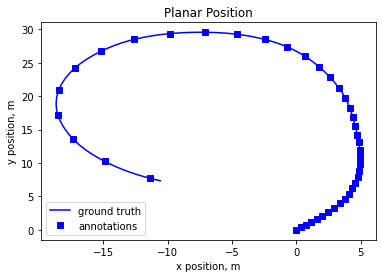

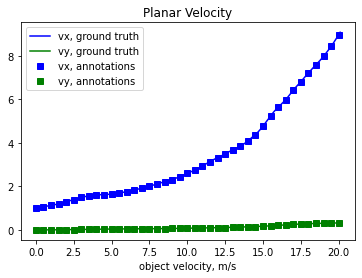

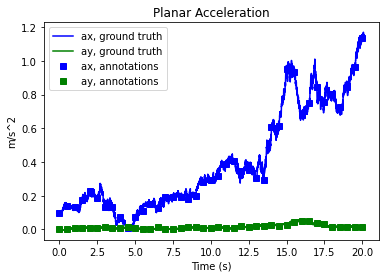

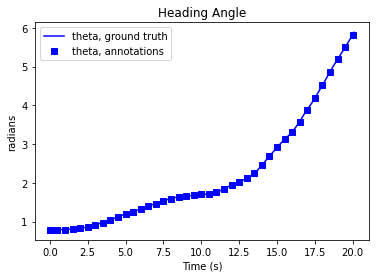

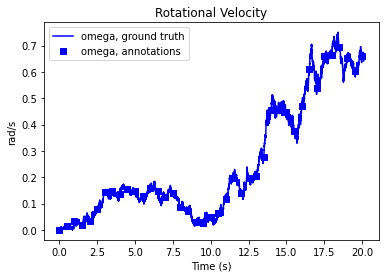

In [117]:
plot_traj_ann_smooth(x,t,x_ann,t_ann)

In [121]:
# Format annotations
annotation_path = '/home/jd/tracking_ws/src/ros_tracking/data/annotations/test'
scene_dict = dict()

# For each object in scene, generate name and category
obj_idx = 0
obj_key = 'test' + str(obj_idx)
obj_cat = 'testobject.dynamic'

# Populate category
obj_dict = dict()
obj_dict['category'] = obj_cat

# Populate states
obj_dict['states'] = dict()
for ii in range(len(t_ann)):    
    obj_dict['states'][ii] = dict()
    
    
    obj_dict['states'][ii]['stamp'] = dict()
    obj_dict['states'][ii]['stamp']['seconds'] = int(math.modf(t_ann[ii])[1])
    obj_dict['states'][ii]['stamp']['nanos'] = int(math.modf(t_ann[ii])[0]*10**9)
    
    obj_dict['states'][ii]['pos'] = dict()
    obj_dict['states'][ii]['pos']['x'] = x_ann[ii][0]
    obj_dict['states'][ii]['pos']['y'] = x_ann[ii][1]
    obj_dict['states'][ii]['pos']['z'] = 0 # TODO
        
    obj_dict['states'][ii]['rot'] = dict()
    obj_dict['states'][ii]['rot']['w'] = np.cos(x_ann[ii][6]/2)
    obj_dict['states'][ii]['rot']['z'] = np.sin(x_ann[ii][6]/2)
    
    obj_dict['states'][ii]['size'] = dict()
    obj_dict['states'][ii]['size']['x'] = 1.
    obj_dict['states'][ii]['size']['y'] = 2.
    obj_dict['states'][ii]['size']['z'] = 3.
    
    obj_dict['states'][ii]['att'] = ''

scene_dict[obj_key] = obj_dict

with open(os.path.join(annotation_path,'test_data.json'),"w") as outfile:
    json.dump(scene_dict,outfile)

# Compare solved values with ground truth (visual)
test_df input - maybe add input args to convert_nuscenes.py

In [105]:
# load variable df
variable_df = pd.read_csv('/home/jd/tracking_ws/src/ros_tracking/data/variables/test.csv')

